In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [41]:
crashes = pd.read_csv('data/Crashes.csv')
parties = pd.read_csv('data/Parties.csv')

In [42]:
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 80 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CASE_ID                  5094 non-null   int64  
 1   ACCIDENT_YEAR            5094 non-null   int64  
 2   PROC_DATE                5094 non-null   object 
 3   JURIS                    5094 non-null   int64  
 4   COLLISION_DATE           5094 non-null   object 
 5   COLLISION_TIME           5094 non-null   int64  
 6   OFFICER_ID               5092 non-null   object 
 7   REPORTING_DISTRICT       4721 non-null   object 
 8   DAY_OF_WEEK              5094 non-null   int64  
 9   CHP_SHIFT                5094 non-null   int64  
 10  POPULATION               5094 non-null   int64  
 11  CNTY_CITY_LOC            5094 non-null   int64  
 12  SPECIAL_COND             5094 non-null   int64  
 13  BEAT_TYPE                5094 non-null   int64  
 14  CHP_BEAT_TYPE           

In [43]:
crashes.shape[0]

5094

In [39]:
crashes.isna().sum().sort_values(ascending = False).head(30)

CITY_DIVISION_LAPD      5094
TRUCK_ACCIDENT          5049
RAMP_INTERSECTION       5039
CALTRANS_DISTRICT       5039
POSTMILE                5038
POSTMILE_PREFIX         5038
ROUTE_SUFFIX            5038
CALTRANS_COUNTY         5038
LOCATION_TYPE           5036
SIDE_OF_HWY             5008
STATE_ROUTE             5005
MOTORCYCLE_ACCIDENT     5001
LONGITUDE               4977
LATITUDE                4977
PEDESTRIAN_ACCIDENT     4855
ALCOHOL_INVOLVED        4786
DIRECTION               3050
PCF_VIOL_SUBSECTION     2901
PCF_VIOLATION            596
REPORTING_DISTRICT       373
BEAT_NUMBER              347
CHP_VEHTYPE_AT_FAULT     262
TOW_AWAY                 155
POINT_Y                  121
POINT_X                  121
OFFICER_ID                 2
STATE_HWY_IND              1
LIGHTING                   0
CONTROL_DEVICE             0
CHP_ROAD_TYPE              0
dtype: int64

None of the missing data is pertinent to our analysis, so we will not drop any records for missing this inofrmation.

In [22]:
crashes['COLLISION_DATE_CLEAN'] = pd.to_datetime(crashes['COLLISION_DATE'], format = 'mixed', errors = 'coerce')

<Axes: xlabel='COLLISION_DATE_CLEAN'>

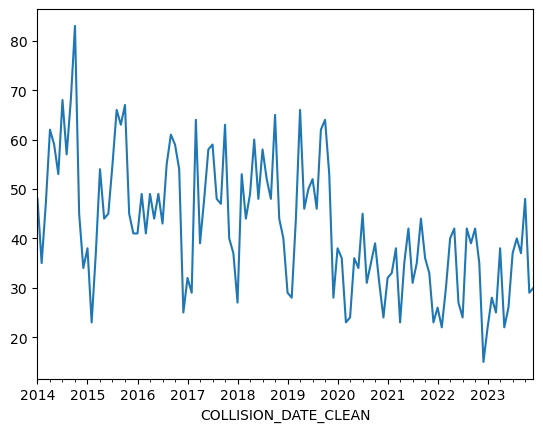

In [23]:
monthly_crashes = crashes.groupby(pd.Grouper(key = 'COLLISION_DATE_CLEAN', freq = 'ME')).size()
fig, ax = plt.subplots()
monthly_crashes.plot(kind= 'line', ax = ax)

We see that the number of crashes have not returned to Pre-covid numbers.

Seasonal Variation

In [24]:
def get_season(date):
    month = date.month
    day = date.day
    if (month >= 3 and month <= 5):
        return 'Spring'
    elif (month >= 6 and month <= 8):
        return 'Summer'
    elif (month >= 9 and month <= 11):
        return 'Autumn'
    else:
        return 'Winter'

    
crashes['SEASON'] = crashes['COLLISION_DATE_CLEAN'].apply(get_season)

In [29]:
seasonly_crashes = crashes.groupby('SEASON').size()
seasonly_crashes

SEASON
Autumn    1479
Spring    1273
Summer    1376
Winter     966
dtype: int64

<Axes: xlabel='COLLISION_DATE_CLEAN'>

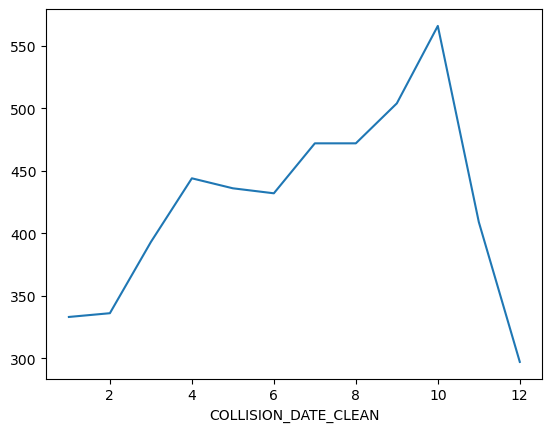

In [31]:
monthly_crashes = crashes.groupby(crashes['COLLISION_DATE_CLEAN'].dt.month).size()

fig, ax = plt.subplots()
monthly_crashes.plot(kind= 'line', ax = ax)

In [32]:
corr_matrix = crashes.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Customize the plot
plt.title('Feature Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the figure
plt.savefig('figures/feature_correlation_heatmap.png', bbox_inches='tight')

# Show the plot
plt.show()

ValueError: could not convert string to float: '2015-08-22'